Import the pandas library for the purpose of creating dataframes.

In [25]:
import pandas as pd

Upload a dataset containing information of geo-coordinates and year of observation for the Mountain Dogwood (cornus nuttalli).

In [27]:
df_mtdogw = pd.read_csv('Desktop/biodata/0075163-200613084148143 - 0075163-200613084148143.csv')

In [28]:
df_mtdogw

,decimalLatitude,decimalLongitude,year
0,42.278810,-123.826406,1984
1,47.037825,-123.006900,1936
2,38.910390,-76.966086,1980
3,36.494104,-118.579392,2004
4,48.674040,-121.268538,2013
...,...,...,...
386,45.501400,-123.253400,1922
387,45.371300,-122.862500,1967
388,44.075900,-123.114200,1963
389,43.977800,-123.140800,1963


Sort the file by year and then reset the index accordingly.

In [29]:
sorted_df = df_mtdogw.sort_values(by='year')


In [30]:
sorted_dfyr = sorted_df.reset_index(drop=True)


In [31]:
sorted_df

,decimalLatitude,decimalLongitude,year
378,45.351400,-122.620800,1899
328,44.499700,-123.416700,1900
374,45.540700,-122.708400,1902
376,45.528900,-122.720000,1903
316,42.439200,-123.327200,1909
...,...,...,...
295,37.740041,-119.609527,2013
186,36.702729,-118.920896,2013
272,38.083874,-120.194893,2013
306,37.480069,-119.632316,2013


In [32]:
sorted_dfyr

,decimalLatitude,decimalLongitude,year
0,45.351400,-122.620800,1899
1,44.499700,-123.416700,1900
2,45.540700,-122.708400,1902
3,45.528900,-122.720000,1903
4,42.439200,-123.327200,1909
...,...,...,...
386,37.740041,-119.609527,2013
387,36.702729,-118.920896,2013
388,38.083874,-120.194893,2013
389,37.480069,-119.632316,2013


Use the geo-coordinates to obtain elevation data for each geo-coordinate through the Open-Elevation API.

In [33]:
import json

In [34]:
import urllib

In [187]:
#json
d_ar=[{}]*len(sorted_dfyr['decimalLatitude'])
for i in range(len(sorted_dfyr['decimalLatitude'][:])):
    d_ar[i]={"latitude":sorted_dfyr['decimalLatitude'][i],"longitude":sorted_dfyr['decimalLongitude'][i]}
location={"locations":d_ar}
json_data=json.dumps(location,skipkeys=int).encode('utf8')

#SEND REQUEST
url="https://api.open-elevation.com/api/v1/lookup"
response = urllib.request.Request(url,json_data,headers={'Content-Type': 'application/json'})
fp=urllib.request.urlopen(response)

#RESPONSE PROCESSING
res_byte=fp.read()
res_str=res_byte.decode("utf8")
js_str=json.loads(res_str)
#print (js_mystr)
fp.close()

#GETTING ELEVATION
response_len=len(js_str['results'])
elev_list2 = []
for j in range(response_len):
    elev_list2.append(js_str['results'][j]['elevation'])

In [188]:
elev_list2

[7,
 252,
 12,
 242,
 288,
 505,
 414,
 54,
 2316,
 288,
 138,
 138,
 72,
 67,
 68,
 406,
 183,
 1530,
 119,
 1982,
 283,
 406,
 74,
 505,
 505,
 1722,
 1251,
 562,
 439,
 849,
 464,
 505,
 1559,
 24,
 1643,
 1229,
 424,
 1868,
 1482,
 2876,
 652,
 1391,
 569,
 949,
 211,
 2146,
 889,
 1956,
 1211,
 141,
 133,
 1391,
 384,
 56,
 336,
 1446,
 112,
 1956,
 67,
 25,
 379,
 114,
 395,
 100,
 1868,
 411,
 1324,
 252,
 691,
 2039,
 757,
 1667,
 1868,
 1415,
 1415,
 1684,
 532,
 1229,
 695,
 695,
 118,
 67,
 1555,
 395,
 1183,
 134,
 132,
 3244,
 1970,
 1209,
 532,
 532,
 976,
 25,
 385,
 474,
 421,
 2045,
 2045,
 1229,
 1564,
 2045,
 328,
 287,
 168,
 113,
 72,
 1079,
 1787,
 1787,
 1802,
 166,
 2056,
 2042,
 998,
 449,
 335,
 62,
 594,
 594,
 1777,
 993,
 1578,
 1640,
 826,
 409,
 1816,
 1232,
 1541,
 174,
 492,
 1247,
 944,
 327,
 124,
 206,
 124,
 1542,
 768,
 19,
 510,
 1336,
 201,
 1290,
 569,
 1627,
 457,
 1278,
 899,
 1824,
 559,
 51,
 451,
 688,
 1416,
 1416,
 559,
 411,
 2004,
 1788

Create a new dataframe with the elevation data temporally sorted.

In [189]:
df_elev = pd.DataFrame({'elevation':elev_list2})



In [190]:
df_elev

,elevation
0,7
1,252
2,12
3,242
4,288
...,...
386,1498
387,1998
388,1151
389,1603


Import statsmodels library and perform a power analysis to determine necessary sample size for a small effect size of at least .2 based on a standard significance of .05 and a power of .08.   This requires at least 199 observations.

In [191]:
from statsmodels.stats import power
nobs = power.tt_solve_power(
effect_size= .2, alpha =0.05, power=0.8 )
print (nobs)

198.1508243394218


Below are several tests for normality from the scipy and statsmodels libraries.  The data is not normally distributed, but with a sample size larger than 20-30 a power analysis is robust to non-normality and linear regressions do not require normality.

In [192]:
from scipy.stats import normaltest
k2, p = normaltest(elev_list2)
print(p)

0.003436126893677618


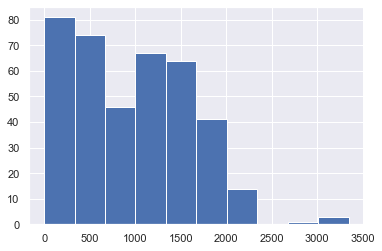

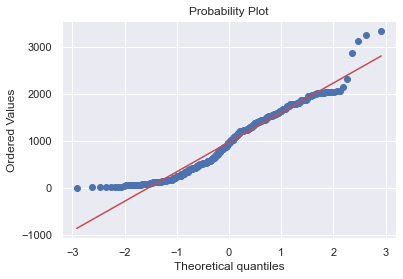

p-values for all 391 data points: ----------------
Omnibus               3.436127e-03
Shapiro-Wilk          6.852133e-10
Lilliefors            1.000000e-03
Kolmogorov-Smirnov    2.043427e-03
dtype: float64
p-values for the first 100 data points: ----------------
Omnibus               1.974113e-03
Shapiro-Wilk          2.044461e-07
Lilliefors            1.000000e-03
Kolmogorov-Smirnov    1.020673e-03
dtype: float64


<ipython-input-193-09d9d741c11d>:23: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pVals = pd.Series()
<ipython-input-193-09d9d741c11d>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pFewVals = pd.Series()


In [193]:
from statsmodels.stats.diagnostic import lilliefors
# Set the parameters
#numData = len(df_elev) 
#myMean = np.mean(df_elev)
#mySD = np.std(df_elev)
    
    # To get reproducable values, I provide a seed value
    #np.random.seed(1234)   
    
    # Generate and show random data
data = elev_list2
#stats.norm.rvs(df_elev)
fewData = data[:100]
plt.hist(data)
plt.show()

    # --- >>> START stats <<< ---
    # Graphical test: if the data lie on a line, they are pretty much
    # normally distributed
_ = stats.probplot(elev_list2, plot=plt)
plt.show()

pVals = pd.Series()
pFewVals = pd.Series()
    # The scipy normaltest is based on D-Agostino and Pearsons test that
    # combines skew and kurtosis to produce an omnibus test of normality.
_, pVals['Omnibus']    = stats.normaltest(data)
_, pFewVals['Omnibus'] = stats.normaltest(fewData)

    # Shapiro-Wilk test
_, pVals['Shapiro-Wilk']    = stats.shapiro(data)
_, pFewVals['Shapiro-Wilk'] = stats.shapiro(fewData)
    
    # Or you can check for normality with Lilliefors-test
_, pVals['Lilliefors']    = lilliefors(data)
_, pFewVals['Lilliefors'] = lilliefors(fewData)
    
    # Alternatively with original Kolmogorov-Smirnov test
_, pVals['Kolmogorov-Smirnov']    = stats.kstest((data-np.mean(data))/np.std(data,ddof=1), 'norm')
_, pFewVals['Kolmogorov-Smirnov'] = stats.kstest((fewData-np.mean(fewData))/np.std(fewData,ddof=1), 'norm')
    
print('p-values for all {0} data points: ----------------'.format(len(data)))
print(pVals)
print('p-values for the first 100 data points: ----------------')
print(pFewVals)
    
if pVals['Omnibus'] > 0.05:
    print('Data are normally distributed')

Performing a natural logarithm transformation of the data is often recommended in cases of positive data with skewness (like the elevation data). Some other possible transformations are: reciprocal x: (1/x), square root x: x**(1/2), and cube root x: x ** (1/3) 

In [195]:
elev_listlog = df_elev['elevation'].apply(lambda x: np.log(x+ 1))
elev_listlog.dropna()

0      2.079442
1      5.533389
2      2.564949
3      5.493061
4      5.666427
         ...   
386    7.312553
387    7.600402
388    7.049255
389    7.380256
390    7.193686
Name: elevation, Length: 391, dtype: float64

4.618016089373011e-31


(array([  1.,   0.,   1.,   4.,   7.,  25.,  36.,  81., 144.,  92.]),
 array([0.        , 0.81155209, 1.62310418, 2.43465626, 3.24620835,
        4.05776044, 4.86931253, 5.68086462, 6.49241671, 7.30396879,
        8.11552088]),
 <BarContainer object of 10 artists>)

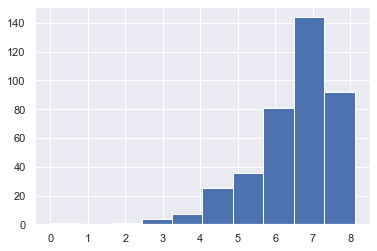

In [196]:
elev_listlog.replace([np.inf, -np.inf], np.nan, inplace=True) 
  
# Dropping all the rows with nan values 
elev_listlog.dropna(inplace=True) 

elev_log = elev_listlog.tolist() 

from scipy.stats import normaltest
k2, p = normaltest(elev_log)
print(p)
plt.hist(elev_log)

In [197]:
elevlogdf = pd.DataFrame(elev_log)
elevlogdf['count'] = elevlogdf.index
elevlogdf

,0,count
0,2.079442,0
1,5.533389,1
2,2.564949,2
3,5.493061,3
4,5.666427,4
...,...,...
386,7.312553,386
387,7.600402,387
388,7.049255,388
389,7.380256,389


Regression analysis on transformed data.

LinregressResult(slope=0.002007253742782476, intercept=6.105618236943026, rvalue=0.20566700998822096, pvalue=4.17330387238908e-05, stderr=0.0004842591442667226)

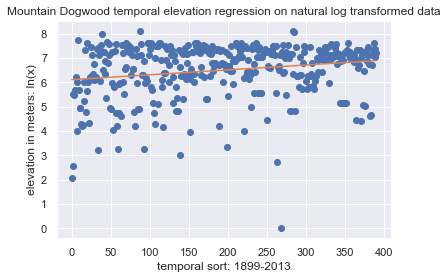

In [198]:
x = elevlogdf['count']
plt.plot(elevlogdf['count'], elevlogdf[0], 'o')
m, b = np.polyfit(elevlogdf['count'], elevlogdf[0], 1)
plt.title('Mountain Dogwood temporal elevation regression on natural log transformed data')
plt.xlabel('temporal sort: 1899-2013')
plt.ylabel('elevation in meters: ln(x)')
plt.plot(x, m*x+b)

from scipy import stats
stats.linregress(x= elevlogdf['count'], y = elevlogdf[0])

In [226]:
y = elevlogdf[0]
x = elevlogdf['count']


import statsmodels.formula.api as sm
model = sm.ols('y~x', data=elevlogdf).fit()
print( model.summary() )

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     17.18
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           4.17e-05
Time:                        19:37:36   Log-Likelihood:                -584.19
No. Observations:                 391   AIC:                             1172.
Df Residuals:                     389   BIC:                             1180.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1056      0.109     55.959      0.0

Create a diagnostic plot in order to check for heteroscedasticity and non-linearity in the regression.

Text(0, 0.5, 'Residuals')

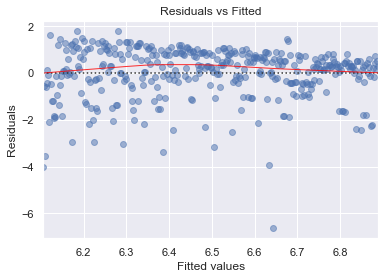

In [235]:
model_fitted_y = model.fittedvalues
# model residuals
model_residuals = model.resid
# normalized residuals
model_norm_residuals = model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(x=model.fittedvalues, y=model.resid,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

Return to the non-transformed data. Create a 'count' column mirroring the index in order to have an x-axis for a linear regression

In [229]:
df_elev['count'] = df_elev.index

In [40]:
df_elev

,elevation,count
0,7,0
1,252,1
2,12,2
3,242,3
4,288,4
...,...,...
386,1498,386
387,1998,387
388,1151,388
389,1603,389


Perform linear regression on elevation data in order to determine if there is a temporal trend in the elevation of observations for the Mountain Dogwood.

In [41]:
import matplotlib.pyplot as plt

In [42]:
import numpy as np

The results of the linear regression indicate a rise of approx. 300 meters over approx. a century of observation.

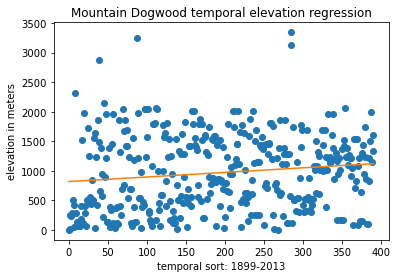

In [43]:
x = df_elev['count']
plt.plot(df_elev['count'], df_elev['elevation'], 'o')
m, b = np.polyfit(df_elev['count'], df_elev['elevation'], 1)
plt.title('Mountain Dogwood temporal elevation regression')
plt.xlabel('temporal sort: 1899-2013')
plt.ylabel('elevation in meters')
plt.plot(x, m*x+b)

In [232]:
y = df_elev['elevation']
x = df_elev['count']


import statsmodels.formula.api as sm
modelorig = sm.ols('y~x', data=df_elev).fit()
print( modelorig.summary() )

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     7.407
Date:                Tue, 10 Nov 2020   Prob (F-statistic):            0.00679
Time:                        19:43:58   Log-Likelihood:                -3078.1
No. Observations:                 391   AIC:                             6160.
Df Residuals:                     389   BIC:                             6168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    818.2174     64.253     12.734      0.0

Create another diagnostic plot.  Comparing this to the diagnostic plot for previous transformed data, the transformation doesn't appear to reduce heteroscedasticity or much non-linearity.

C:\Users\blant\anaconda3\envs\bob\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residuals')

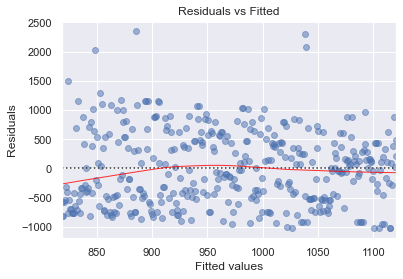

In [231]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(modelorig.fittedvalues, modelorig.resid,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

Below we get the p value on the regression to determine if the modeling is significant (p value < .05).

In [44]:
from scipy import stats
stats.linregress(x= df_elev['count'], y = df_elev['elevation'])

LinregressResult(slope=0.776116466653551, intercept=818.2173913043478, rvalue=0.13669165058396915, pvalue=0.006790128007655335, stderr=0.28517694679611183)

It's possible that this finding is confounded by other variables. One possibility is latitude (other possibilities outside the domain of this analysis include moisture levels, pathogens and geographic peculiarities e.g. the southern portion of a mountain range may have higher elevations allowing for more specimen observations of alpine species in the southern region). There may also be issues of sampling bias (the lower left portion of the latitudinal regression corresponding to more southerly observations before the 1920s seems to have a suspicious lack of data). We run a linear regression upon changes in latitude over the approx. century of observation. We find there has been a southward shift of approx. 2 degrees of latitude.

Normality test and histogram plot for latitude data.

1.2398461125576244e-11


<AxesSubplot:xlabel='decimalLatitude', ylabel='Count'>

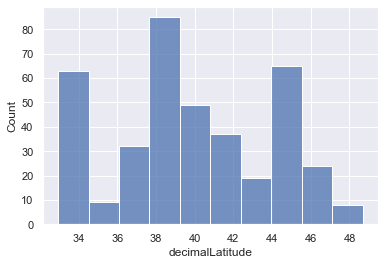

In [206]:
from scipy.stats import normaltest
k2, p = normaltest(sorted_dfyr['decimalLatitude'])
print(p)
sns.histplot(sorted_dfyr['decimalLatitude'])

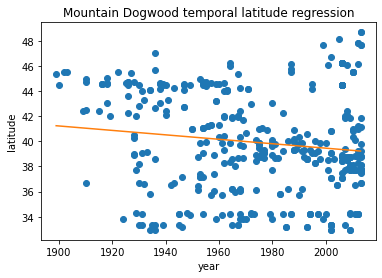

In [45]:
x = sorted_dfyr['year']
plt.plot(sorted_dfyr['year'], sorted_dfyr['decimalLatitude'], 'o')
m, b = np.polyfit(sorted_dfyr['year'], sorted_dfyr['decimalLatitude'], 1)
plt.title('Mountain Dogwood temporal latitude regression')
plt.xlabel('year')
plt.ylabel('latitude')
plt.plot(x, m*x+b)

Obtain a p level below alpha of .05 which grants this finding statistical significance.

In [46]:

stats.linregress(x= sorted_dfyr['year'], y = sorted_dfyr['decimalLatitude'])

LinregressResult(slope=-0.017677453307400937, intercept=74.80543831268966, rvalue=-0.1339874979837837, pvalue=0.007979854966857325, stderr=0.006628981925000532)

In [28]:
b

74.80543831268963

In [30]:
m

-0.017677453307400927

Latitude shift from 1900 to 2010:

In [31]:
m*1900 + b

41.21827702862787

In [32]:
m*2010 + b

39.273757164813766

Below is the same elevation regression from earlier, along with the shift in means (818 m to 1121 m)

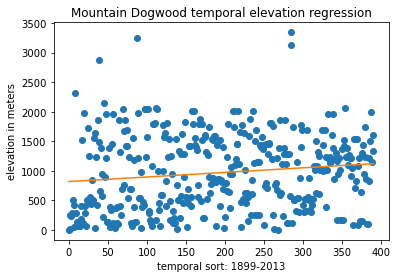

In [70]:
x = df_elev['count']
plt.plot(df_elev['count'], df_elev['elevation'], 'o')
m, b = np.polyfit(df_elev['count'], df_elev['elevation'], 1)
plt.title('Mountain Dogwood temporal elevation regression')
plt.xlabel('temporal sort: 1899-2013')
plt.ylabel('elevation in meters')
plt.plot(x, m*x+b)

In [34]:
b

818.2173913043474

In [35]:
m*390 + b

1120.9028132992325



Is a southward shift of 2 degrees sufficient to explain the rise in elevation? The average treeline in the North Cascades is at approx. 1800 meters of elevation. In the Sierra Nevadas the treeline on average is found at approx. 3000 meters. This is a decline of 1200 meters as we head approx. 10 degrees further north in latitude, or about 120 meters per degree of latitude. It would seem the rise in elevation is confounded somewhat by the southward shift of the Mountain Dogwood.


In [73]:
1200/ 10

120.0

We can also run another regression based on our specific species data to see how elevation relates to latitude.

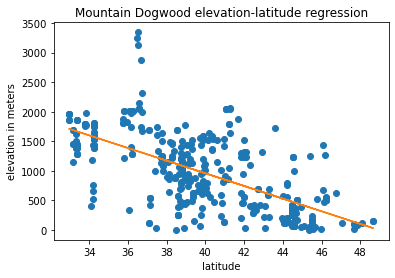

In [69]:
x = sorted_dfyr['decimalLatitude']
plt.plot(sorted_dfyr['decimalLatitude'], df_elev['elevation'], 'o')
m, b = np.polyfit(sorted_dfyr['decimalLatitude'], df_elev['elevation'], 1)
plt.title('Mountain Dogwood elevation-latitude regression')
plt.xlabel('latitude')
plt.ylabel('elevation in meters')
plt.plot(x, m*x+b)

We can see that the relationship is not unexpected with a decrease of approx. 1100 meters in average elevation across 10 degrees of latitude.

In [59]:
m*37 + b

1278.4593751827324

In [53]:
m*47 + b

208.77692077522352

As a final look, we can insert a confidence interval shading on the regression.  

<AxesSubplot:xlabel='count', ylabel='elevation'>

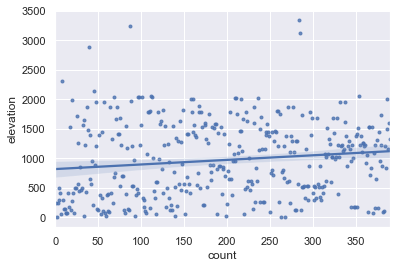

In [142]:
import seaborn as sns
sns.set(style="darkgrid")  
scatter_kws={"s": 1}

sns.regplot(x = 'count', y ='elevation', data=df_elev, marker = '.', ci=95)

Run a regression analysis on the Whitebark Pine (pinus albicaulis):

In [119]:
df_pin = pd.read_csv('Desktop/biodata/0077546-200613084148143 - 0077546-200613084148143.csv')

This file comes with some pre-existing elevation data, but is incomplete and so once again obtain information from Open-Elevation API.

In [120]:
df_pin

,decimalLatitude,decimalLongitude,elevation,eventDate,year
0,40.479957,-121.503473,NaN,2007-08-07T09:00:00,2007
1,39.315063,-119.885506,NaN,2008-02-18T08:00:00,2008
2,43.749949,-110.079905,NaN,2004-01-21T09:50:00,2004
3,41.027222,-115.085000,2545.00,2004-07-28T00:00:00,2004
4,41.027222,-115.085000,2545.00,2004-07-28T00:00:00,2004
...,...,...,...,...,...
266,42.600000,-120.200000,NaN,1936-07-05T00:00:00,1936
267,44.300000,-121.800000,NaN,1934-06-10T00:00:00,1934
268,44.600000,-118.600000,2377.44,1925-07-25T00:00:00,1925
269,43.500000,-122.100000,NaN,1932-07-04T00:00:00,1932


Sort the data temporally:

In [121]:
sorted_dfpin = df_pin.sort_values(by='eventDate')


In [122]:
sorted_dfpin

,decimalLatitude,decimalLongitude,elevation,eventDate,year
210,46.033730,-121.492740,1982.0,1892-08-03T00:00:00,1892
183,45.500000,-111.330000,2150.0,1897-07-28T00:00:00,1897
78,37.843810,-119.421830,NaN,1898-08-07T00:00:00,1898
143,41.369300,-122.349800,1905.0,1899-08-01T00:00:00,1899
168,41.316600,-122.486700,NaN,1899-08-01T00:00:00,1899
...,...,...,...,...,...
200,44.282600,-118.707330,2419.0,2010-07-16T00:00:00,2010
22,43.706387,-121.235712,NaN,2010-07-16T11:51:00,2010
201,44.575610,-118.625310,2232.0,2010-07-17T00:00:00,2010
199,44.332403,-118.807523,1894.0,2010-07-18T00:00:00,2010


In [123]:
sorted_dfpinyr = sorted_dfpin.reset_index(drop=True)


In [124]:
sorted_dfpinyr

,decimalLatitude,decimalLongitude,elevation,eventDate,year
0,46.033730,-121.492740,1982.0,1892-08-03T00:00:00,1892
1,45.500000,-111.330000,2150.0,1897-07-28T00:00:00,1897
2,37.843810,-119.421830,NaN,1898-08-07T00:00:00,1898
3,41.369300,-122.349800,1905.0,1899-08-01T00:00:00,1899
4,41.316600,-122.486700,NaN,1899-08-01T00:00:00,1899
...,...,...,...,...,...
266,44.282600,-118.707330,2419.0,2010-07-16T00:00:00,2010
267,43.706387,-121.235712,NaN,2010-07-16T11:51:00,2010
268,44.575610,-118.625310,2232.0,2010-07-17T00:00:00,2010
269,44.332403,-118.807523,1894.0,2010-07-18T00:00:00,2010


In [243]:
#json
d_ar=[{}]*len(sorted_dfpinyr['decimalLatitude'])
for i in range(len(sorted_dfpinyr['decimalLatitude'][:])):
    d_ar[i]={"latitude":sorted_dfpinyr['decimalLatitude'][i],"longitude":sorted_dfpinyr['decimalLongitude'][i]}
location={"locations":d_ar}
json_data=json.dumps(location,skipkeys=int).encode('utf8')

#SEND REQUEST
url="https://api.open-elevation.com/api/v1/lookup"
response = urllib.request.Request(url,json_data,headers={'Content-Type': 'application/json'})
fp=urllib.request.urlopen(response)

#RESPONSE PROCESSING
res_byte=fp.read()
res_str=res_byte.decode("utf8")
js_str=json.loads(res_str)
#print (js_mystr)
fp.close()

#GETTING ELEVATION
response_len=len(js_str['results'])
elev_list2 = []
for j in range(response_len):
    elev_list2.append(js_str['results'][j]['elevation'])

In [128]:
elev_list2

[758,
 1742,
 2838,
 1744,
 2460,
 1744,
 1744,
 222,
 2321,
 2364,
 2736,
 2746,
 880,
 3258,
 1754,
 1936,
 710,
 1663,
 1951,
 1843,
 782,
 1329,
 1329,
 1480,
 2376,
 1891,
 2002,
 1537,
 2136,
 3057,
 2827,
 2900,
 2899,
 3122,
 2452,
 1914,
 1991,
 2900,
 3125,
 2946,
 2452,
 2409,
 1564,
 1564,
 3349,
 2905,
 1396,
 2106,
 3129,
 3269,
 3269,
 2826,
 2809,
 3032,
 1298,
 3309,
 3500,
 2187,
 866,
 1991,
 1824,
 1419,
 3081,
 2191,
 1472,
 1742,
 448,
 2938,
 224,
 2826,
 2655,
 364,
 365,
 2122,
 2836,
 2522,
 147,
 3269,
 3703,
 1667,
 1179,
 2935,
 3084,
 3047,
 1382,
 1795,
 3809,
 2226,
 1938,
 2142,
 2353,
 3050,
 3061,
 1530,
 2236,
 3456,
 2213,
 1843,
 2378,
 1979,
 2736,
 2790,
 1959,
 2474,
 1283,
 1663,
 2280,
 2595,
 2002,
 2968,
 3008,
 2804,
 1936,
 3290,
 1161,
 956,
 3146,
 1161,
 3039,
 3155,
 3155,
 3010,
 3054,
 2909,
 3071,
 2552,
 2552,
 3241,
 2991,
 2831,
 3234,
 2280,
 3343,
 2696,
 2696,
 3214,
 1988,
 2469,
 2719,
 2496,
 2775,
 3131,
 3071,
 3071,
 307

In [129]:
df_pinelev = pd.DataFrame({'elevation':elev_list2})


In [130]:
df_pinelev['count'] = df_pinelev.index

In [131]:
df_pinelev

,elevation,count
0,758,0
1,1742,1
2,2838,2
3,1744,3
4,2460,4
...,...,...
266,2407,266
267,1945,267
268,2135,268
269,1938,269


Run regression analyses again on elevation and latitude.  This time both results show a trend toward colder climates, indicating that the Whitebark Pine may be a better candidate of a species impacted by globally rising temperatures.

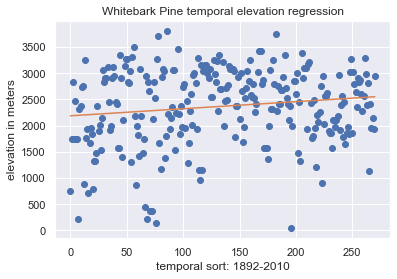

In [132]:
x = df_pinelev['count']
plt.plot(df_pinelev['count'], df_pinelev['elevation'], 'o')
m, b = np.polyfit(df_pinelev['count'], df_pinelev['elevation'], 1)
plt.title('Whitebark Pine temporal elevation regression')
plt.xlabel('temporal sort: 1892-2010')
plt.ylabel('elevation in meters')
plt.plot(x, m*x+b)

Below is a summary results table for the model, along with confidence intervals and a plot of the regression.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     5.836
Date:                Wed, 11 Nov 2020   Prob (F-statistic):             0.0164
Time:                        14:15:59   Log-Likelihood:                -2165.8
No. Observations:                 271   AIC:                             4336.
Df Residuals:                     269   BIC:                             4343.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2185.9476     87.000     25.126      0.0

,0,1
Intercept,2014.660625,2357.234643
x,0.249269,2.444851


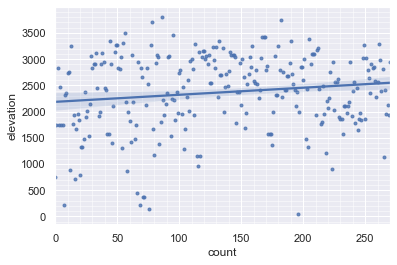

In [259]:
import seaborn as sns
import matplotlib as mpl

sns.set(style="darkgrid")  
scatter_kws={"s": 1}

fig, ax = plt.subplots(1, 1)


sns.regplot(x = 'count', y ='elevation', data=df_pinelev, marker = '.', ci=90)
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)

y = df_pinelev['elevation']
x = df_pinelev['count']


import statsmodels.formula.api as sm
model = sm.ols('y~x', data=df_pinelev).fit()
print( model.summary() )
model.conf_int()

A test for detecting heteroscedasticity with no significant results:

In [260]:
from statsmodels.stats.diagnostic import het_white

white_test = het_white(model.resid,  model.model.exog)
white_test

(9.479697258053799,
 0.008739969062970072,
 4.857288016497326,
 0.00846915353155041)

There are multiple ways to calculate effect size from the summary results table.  One can do 2 * (t-statistic)/ sqrt(df residuals) to obtain Cohen's d.  2 * (2.416)/sqrt(269) gives approximately .295 and is above the threshold of a .2 effect size  used for the power analysis earlier.  One can also used the R-squared value to derive Cohen's f, another effect size measure where .1 ** 2 , .25 ** 2,  .4 ** 2 = small, medium,large effect sizes.
r squared/ 1-r squared = f squared.  One can also calculate cohen's d from the r squared, d = sqrt(4r ** 2/ 1 - r ** 2).  An r squared of .01, .059, .138 is equivalent to effect size .2, .5, .8

Plot to visually inspect the residuals.  The bow-shaped curve indicates there may be some non-linearity in our model:

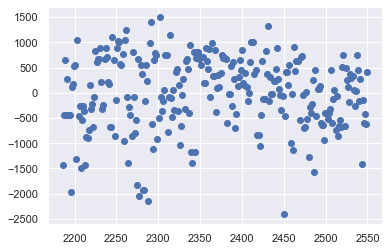

In [261]:
plt.scatter(model.fittedvalues,model.resid)

C:\Users\blant\anaconda3\envs\bob\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residuals')

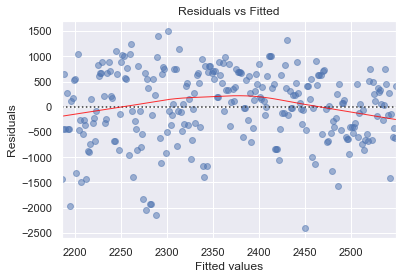

In [262]:
model_fitted_y = model.fittedvalues
# model residuals
model_residuals = model.resid
# normalized residuals
model_norm_residuals = model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model.fittedvalues, model.resid,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')





In [133]:
from scipy import stats
stats.linregress(x= df_pinelev['count'], y = df_pinelev['elevation'])

LinregressResult(slope=1.3470600294238242, intercept=2185.947634035164, rvalue=0.14572588657724095, pvalue=0.016364142072619867, stderr=0.5575875775453764)

We can attempt a weak transformation with square root of our data

In [248]:
elev_listsqrt = df_pinelev['elevation'].apply(lambda x: x ** (1/2))
elev_listsqrt.dropna()

0      27.531800
1      41.737274
2      53.272882
3      41.761226
4      49.598387
         ...    
266    49.061186
267    44.102154
268    46.206060
269    44.022721
270    54.332311
Name: elevation, Length: 271, dtype: float64

4.42853700586473e-22


(array([ 1.,  3.,  3.,  3.,  5., 18., 55., 60., 96., 27.]),
 array([ 6.244998  , 11.79220785, 17.3394177 , 22.88662755, 28.4338374 ,
        33.98104725, 39.5282571 , 45.07546695, 50.6226768 , 56.16988665,
        61.7170965 ]),
 <BarContainer object of 10 artists>)

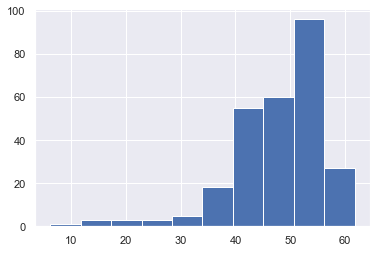

In [249]:
from scipy.stats import normaltest
k2, p = normaltest(elev_listsqrt)
print(p)
plt.hist(elev_listsqrt)

In [250]:
elevsqrtdf = pd.DataFrame(elev_listsqrt)
elevsqrtdf['count'] = elevsqrtdf.index
elevsqrtdf

,elevation,count
0,27.531800,0
1,41.737274,1
2,53.272882,2
3,41.761226,3
4,49.598387,4
...,...,...
266,49.061186,266
267,44.102154,267
268,46.206060,268
269,44.022721,269


Perform regression on the transformed data.

LinregressResult(slope=0.017928380533611274, intercept=45.454336873589874, rvalue=0.16107710780574458, pvalue=0.007889146918840366, stderr=0.00669765314039644)

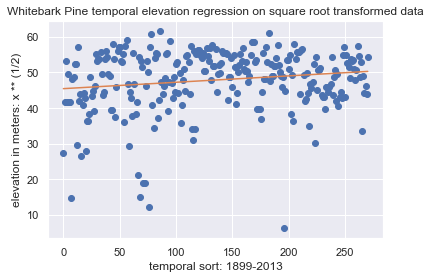

In [251]:
x = elevsqrtdf['count']
plt.plot(elevsqrtdf['count'], elevsqrtdf['elevation'], 'o')
m, b = np.polyfit(elevsqrtdf['count'], elevsqrtdf['elevation'], 1)
plt.title('Whitebark Pine temporal elevation regression on square root transformed data')
plt.xlabel('temporal sort: 1899-2013')
plt.ylabel('elevation in meters: x ** (1/2)')
plt.plot(x, m*x+b)

from scipy import stats
stats.linregress(x= elevsqrtdf['count'], y = elevsqrtdf['elevation'])

In [252]:
y = elevsqrtdf['elevation']
x = elevsqrtdf['count']


import statsmodels.formula.api as sm
model = sm.ols('y~x', data=elevsqrtdf).fit()
print( model.summary() )

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     7.165
Date:                Wed, 11 Nov 2020   Prob (F-statistic):            0.00789
Time:                        14:05:25   Log-Likelihood:                -967.46
No. Observations:                 271   AIC:                             1939.
Df Residuals:                     269   BIC:                             1946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.4543      1.045     43.496      0.0

Visually inspect the residuals and determine the curve is somewhat flattened.

Text(0, 0.5, 'Residuals')

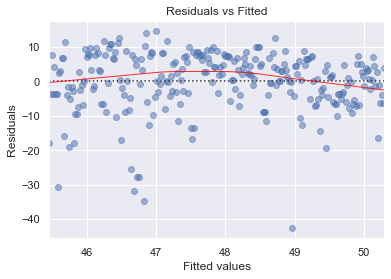

In [253]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(x=model.fittedvalues, y=model.resid,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

In [ ]:
Run regression on the latitude data:

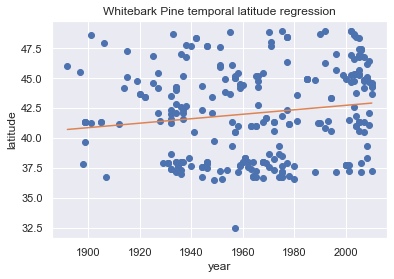

In [255]:
x = sorted_dfpinyr['year']
plt.plot(sorted_dfpinyr['year'], sorted_dfpinyr['decimalLatitude'], 'o')
m, b = np.polyfit(sorted_dfpinyr['year'], sorted_dfpinyr['decimalLatitude'], 1)
plt.title('Whitebark Pine temporal latitude regression')
plt.xlabel('year')
plt.ylabel('latitude')
plt.plot(x, m*x+b)

In [256]:
from scipy import stats
stats.linregress(x= sorted_dfpinyr['year'], y = sorted_dfpinyr['decimalLatitude'])

LinregressResult(slope=0.018682344796864373, intercept=5.366110807811303, rvalue=0.1521911421396471, pvalue=0.012126877102004347, stderr=0.007397366014560263)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     7.165
Date:                Wed, 11 Nov 2020   Prob (F-statistic):            0.00789
Time:                        14:14:05   Log-Likelihood:                -967.46
No. Observations:                 271   AIC:                             1939.
Df Residuals:                     269   BIC:                             1946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.4543      1.045     43.496      0.0

,0,1
Intercept,-23.260944,33.993166
xl,0.004118,0.033246


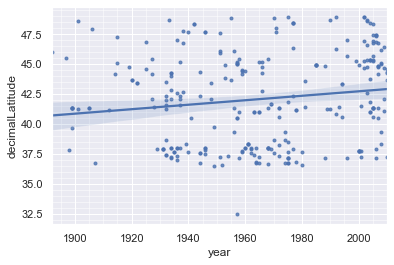

In [257]:
sns.set(style="darkgrid")  
scatter_kws={"s": 1}

fig, ax = plt.subplots(1, 1)


sns.regplot(x = 'year', y ='decimalLatitude', data=sorted_dfpinyr, marker = '.', ci=95)
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)

yl=sorted_dfpinyr['decimalLatitude']
xl=sorted_dfpinyr['year']
import statsmodels.formula.api as sm
modellat = sm.ols('yl~xl', data=sorted_dfpinyr).fit()
print( model.summary() )
modellat.conf_int()

Visual inspection of residuals reveals another bow-shaped curve and one could opt to perform another transformation.

Text(0, 0.5, 'Residuals')

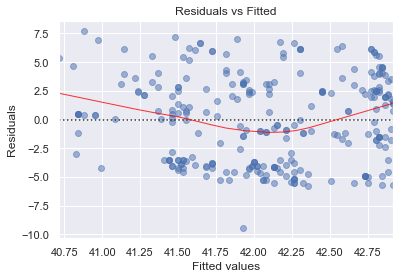

In [258]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(x=modellat.fittedvalues, y=modellat.resid,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

Regression of elevation on latitude:

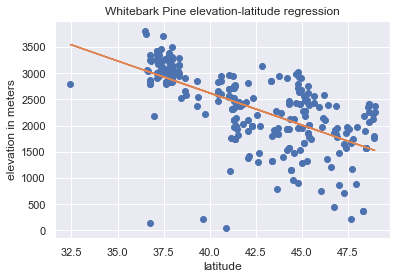

In [135]:
x = sorted_dfpinyr['decimalLatitude']
plt.plot(sorted_dfpinyr['decimalLatitude'], df_pinelev['elevation'], 'o')
m, b = np.polyfit(sorted_dfpinyr['decimalLatitude'], df_pinelev['elevation'], 1)
plt.title('Whitebark Pine elevation-latitude regression')
plt.xlabel('latitude')
plt.ylabel('elevation in meters')
plt.plot(x, m*x+b)

Regression reveals a shift of approx. 1200 m in elevation over 10 degrees of latitude.

In [61]:
m*37 + b

2989.4288356814277

In [56]:
m*47 + b

1766.5695797003218

The Whitebark Pine is a high-elevation conifer, often found at the treeline or above it in the form of krummholz ("crooked timber"), as the preceding regression indicates.


Pacific Yew (taxus brevifolia) analysis:

In [75]:
df_yew = pd.read_csv('Desktop/0079777-200613084148143 - 0079777-200613084148143.csv')

In [76]:
df_yew

,species,locality,stateProvince,decimalLatitude,decimalLongitude,eventDate,year
0,Taxus brevifolia,Weott,California,40.351806,-123.923694,1957-08-21T00:00:00,1957
1,Taxus brevifolia,2 mi N of Easton,Washington,47.266011,-121.178979,1915-07-31T00:00:00,1915
2,Taxus brevifolia,Wimer,Oregon,42.538732,-123.148943,1893-04-03T00:00:00,1893
3,Taxus brevifolia,Newberg,Oregon,45.300118,-122.973156,1940-10-16T00:00:00,1940
4,Taxus brevifolia,near Bridgeville,NaN,40.500000,-123.800000,1933-03-19T00:00:00,1933
...,...,...,...,...,...,...,...
371,Taxus brevifolia,Fairview Mountain; at lookout on top.,Oregon,43.585800,-122.652700,1935-06-27T00:00:00,1935
372,Taxus brevifolia,"Belknap Ranch, McKenzie River.",Oregon,43.963500,-122.145300,1936-08-03T00:00:00,1936
373,Taxus brevifolia,Breitenbush Springs.,Oregon,44.783100,-121.977800,1936-07-23T00:00:00,1936
374,Taxus brevifolia,Fall Creek.,Oregon,43.959700,-122.819200,1932-05-17T00:00:00,1932


In [77]:
sorted_dfyew = df_yew.sort_values(by='eventDate')


In [78]:
sorted_dfyewyr = sorted_dfyew.reset_index(drop=True)

In [82]:
#json
d_ar=[{}]*len(sorted_dfyewyr['decimalLatitude'])
for i in range(len(sorted_dfyewyr['decimalLatitude'][:])):
    d_ar[i]={"latitude":sorted_dfyewyr['decimalLatitude'][i],"longitude":sorted_dfyewyr['decimalLongitude'][i]}
location={"locations":d_ar}
json_data=json.dumps(location,skipkeys=int).encode('utf8')

#SEND REQUEST
url="https://api.open-elevation.com/api/v1/lookup"
response = urllib.request.Request(url,json_data,headers={'Content-Type': 'application/json'})
fp=urllib.request.urlopen(response)

#RESPONSE PROCESSING
res_byte=fp.read()
res_str=res_byte.decode("utf8")
js_str=json.loads(res_str)
#print (js_mystr)
fp.close()

#GETTING ELEVATION
response_len=len(js_str['results'])
elev_list2 = []
for j in range(response_len):
    elev_list2.append(js_str['results'][j]['elevation'])

In [83]:
elev_list2

[82,
 11,
 624,
 573,
 348,
 799,
 1092,
 1190,
 596,
 665,
 65,
 1051,
 113,
 63,
 1064,
 45,
 1029,
 1054,
 1064,
 1058,
 1265,
 1835,
 1117,
 751,
 63,
 82,
 82,
 26,
 26,
 681,
 2285,
 1289,
 1015,
 958,
 958,
 958,
 755,
 703,
 90,
 31,
 168,
 347,
 114,
 64,
 879,
 414,
 1268,
 1507,
 1117,
 950,
 623,
 623,
 958,
 675,
 85,
 505,
 710,
 69,
 1148,
 20,
 68,
 835,
 238,
 238,
 238,
 1681,
 356,
 659,
 1808,
 1151,
 779,
 508,
 262,
 628,
 79,
 583,
 401,
 4,
 183,
 1722,
 787,
 82,
 242,
 269,
 918,
 1982,
 802,
 659,
 1116,
 1544,
 2083,
 1675,
 119,
 789,
 789,
 569,
 1259,
 1686,
 1058,
 1131,
 1131,
 642,
 1260,
 830,
 196,
 125,
 186,
 523,
 233,
 708,
 1560,
 2192,
 1070,
 567,
 85,
 1889,
 986,
 435,
 85,
 226,
 1068,
 1763,
 45,
 11,
 569,
 347,
 252,
 688,
 722,
 1275,
 1165,
 252,
 1293,
 53,
 778,
 1427,
 915,
 1540,
 373,
 89,
 377,
 32,
 2,
 0,
 12,
 0,
 106,
 32,
 395,
 825,
 825,
 949,
 44,
 44,
 837,
 847,
 202,
 421,
 2337,
 2337,
 946,
 421,
 56,
 820,
 304,
 25

In [84]:
df_yewelev = pd.DataFrame({'elevation':elev_list2})


In [85]:
df_yewelev['count'] = df_yewelev.index

In [86]:
df_yewelev

,elevation,count
0,82,0
1,11,1
2,624,2
3,573,3
4,348,4
...,...,...
371,0,371
372,107,372
373,1198,373
374,886,374


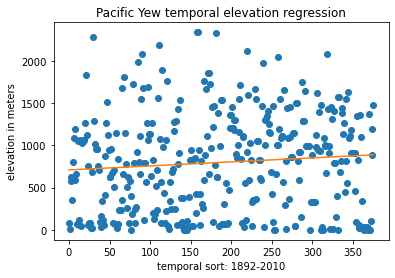

In [87]:
x = df_yewelev['count']
plt.plot(df_yewelev['count'], df_yewelev['elevation'], 'o')
m, b = np.polyfit(df_yewelev['count'], df_yewelev['elevation'], 1)
plt.title('Pacific Yew temporal elevation regression')
plt.xlabel('temporal sort: 1892-2010')
plt.ylabel('elevation in meters')
plt.plot(x, m*x+b)

In [88]:
b

709.2268609966698

In [89]:
m*376 + b

888.1745957446808

There's been an upward rise of approx. 180 m over the observation period.

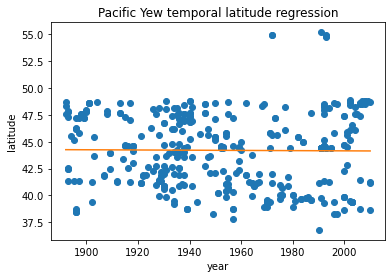

In [90]:
x = sorted_dfyewyr['year']
plt.plot(sorted_dfyewyr['year'], sorted_dfyewyr['decimalLatitude'], 'o')
m, b = np.polyfit(sorted_dfyewyr['year'], sorted_dfyewyr['decimalLatitude'], 1)
plt.title('Pacific Yew temporal latitude regression')
plt.xlabel('year')
plt.ylabel('latitude')
plt.plot(x, m*x+b)

In [91]:
m*1892 + b

44.25986852545504

In [92]:
m*2020 + b

44.131362942588325

The latitude has remained largely static.

There are a few outliers on the preceding chart that one may investigate.  They belong to a population in Alaska.

In [99]:
sorted_dfyewyr.loc[sorted_dfyewyr['decimalLatitude'] >= 50]


,species,locality,stateProvince,decimalLatitude,decimalLongitude,eventDate,year
253,Taxus brevifolia,"Dog I., 40 km SSE of Ketchikan",Alaska,54.98,-131.31,1972-07-24T00:00:00,1972
254,Taxus brevifolia,"Dog I., 40 km SSE of Ketchikan",Alaska,54.98,-131.31,1972-07-24T00:00:00,1972
297,Taxus brevifolia,"Revillagegedo I., Alava Bay, 1 mile SW of Alav...",Alaska,55.21,-131.11,1991-12-29T00:00:00,1991
311,Taxus brevifolia,"Head of Nakat Inlet, on fish corral island",Alaska,54.94,-130.74,1993-07-07T00:00:00,1993
312,Taxus brevifolia,"Prince of Wales Island, Kendrick Bay, S side o...",Alaska,54.85,-132.00,1993-08-12T00:00:00,1993
313,Taxus brevifolia,"Prince of Wales Island, McLean Arm, N shore of...",Alaska,54.81,-132.06,1993-08-13T00:00:00,1993


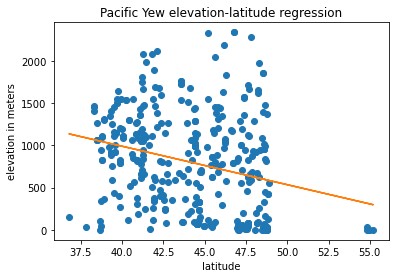

In [93]:
x = sorted_dfyewyr['decimalLatitude']
plt.plot(sorted_dfyewyr['decimalLatitude'], df_yewelev['elevation'], 'o')
m, b = np.polyfit(sorted_dfyewyr['decimalLatitude'], df_yewelev['elevation'], 1)
plt.title('Pacific Yew elevation-latitude regression')
plt.xlabel('latitude')
plt.ylabel('elevation in meters')
plt.plot(x, m*x+b)

In [94]:
m*37 + b

1125.793568999732

In [100]:
m*47 + b

671.0696474977376

Oregon Oak (quercus garryana) analysis:


In [101]:
df_oak = pd.read_csv('Desktop/0080246-200613084148143 - 0080246-200613084148143.csv')

In [102]:
df_oak

,species,infraspecificEpithet,locality,stateProvince,decimalLatitude,decimalLongitude,eventDate,year
0,Quercus garryana,NaN,San Juan Island,Washington,48.540932,-123.086016,1925-08-18T00:00:00,1925
1,Quercus garryana,NaN,Yolo County; UC Davis Arboretum; Section: Shie...,California,38.529444,-121.765000,2009-10-08T00:00:00,2009
2,Quercus garryana,breweri,Yolo County; UC Davis Arboretum; Section: Shie...,California,38.529167,-121.765000,2009-10-08T00:00:00,2009
3,Quercus garryana,NaN,Josephine Co.: Cave Junction. Eight Dollar Mou...,Oregon,42.250000,-123.683333,2006-07-26T00:00:00,2006
4,Quercus garryana,breweri,Yolo County; UC Davis Arboretum; Section: Cali...,California,38.534444,-121.750556,2009-11-05T00:00:00,2009
...,...,...,...,...,...,...,...,...
668,Quercus garryana,garryana,Rowena.,Oregon,45.672500,-121.267200,1932-04-24T00:00:00,1932
669,Quercus garryana,garryana,"Rebel Rock, S. Fk. McKenzie River.",Oregon,44.006500,-122.035800,1965-06-30T00:00:00,1965
670,Quercus garryana,breweri,on blocks of andesite by road to Musick Mine; ...,Oregon,43.579300,-122.657500,1965-07-09T00:00:00,1965
671,Quercus garryana,garryana,"Castle Rock, McKenzie River Region.",Oregon,44.149900,-122.213300,1967-06-28T00:00:00,1967


In [104]:
sorted_dfoak = df_oak.sort_values(by='eventDate')


In [105]:
sorted_dfoakyr = sorted_dfoak.reset_index(drop=True)

In [107]:
#json
d_ar=[{}]*len(sorted_dfoakyr['decimalLatitude'])
for i in range(len(sorted_dfoakyr['decimalLatitude'][:])):
    d_ar[i]={"latitude":sorted_dfoakyr['decimalLatitude'][i],"longitude":sorted_dfoakyr['decimalLongitude'][i]}
location={"locations":d_ar}
json_data=json.dumps(location,skipkeys=int).encode('utf8')

#SEND REQUEST
url="https://api.open-elevation.com/api/v1/lookup"
response = urllib.request.Request(url,json_data,headers={'Content-Type': 'application/json'})
fp=urllib.request.urlopen(response)

#RESPONSE PROCESSING
res_byte=fp.read()
res_str=res_byte.decode("utf8")
js_str=json.loads(res_str)
#print (js_mystr)
fp.close()

#GETTING ELEVATION
response_len=len(js_str['results'])
elev_list2 = []
for j in range(response_len):
    elev_list2.append(js_str['results'][j]['elevation'])

In [108]:
elev_list2

[325,
 292,
 740,
 66,
 560,
 599,
 599,
 371,
 599,
 2553,
 66,
 1640,
 1443,
 4294,
 157,
 587,
 1282,
 398,
 398,
 420,
 425,
 71,
 662,
 662,
 662,
 242,
 422,
 131,
 40,
 131,
 114,
 63,
 3439,
 40,
 40,
 288,
 311,
 82,
 135,
 1499,
 1727,
 660,
 614,
 915,
 614,
 157,
 157,
 1807,
 429,
 860,
 656,
 212,
 1033,
 344,
 614,
 249,
 221,
 68,
 395,
 395,
 577,
 577,
 14,
 309,
 807,
 1179,
 197,
 197,
 314,
 656,
 178,
 451,
 70,
 495,
 511,
 511,
 445,
 326,
 121,
 29,
 628,
 50,
 730,
 730,
 0,
 120,
 58,
 134,
 344,
 157,
 157,
 307,
 665,
 1233,
 662,
 644,
 178,
 40,
 898,
 26,
 40,
 430,
 687,
 687,
 47,
 1272,
 1584,
 352,
 492,
 388,
 2443,
 2174,
 705,
 21,
 515,
 1116,
 88,
 592,
 84,
 473,
 404,
 511,
 326,
 54,
 278,
 278,
 278,
 278,
 278,
 621,
 621,
 621,
 621,
 47,
 127,
 531,
 498,
 344,
 435,
 1025,
 569,
 647,
 1122,
 739,
 624,
 129,
 40,
 133,
 99,
 1087,
 1087,
 1087,
 1087,
 1397,
 21,
 21,
 21,
 21,
 832,
 880,
 8,
 21,
 21,
 2107,
 1045,
 899,
 662,
 1006,


In [110]:
df_oakelev = pd.DataFrame({'elevation':elev_list2})


In [159]:
df_oakelev['count'] = df_oakelev.index

In [160]:
df_oakelev

,elevation,count
0,325,0
1,292,1
2,740,2
3,66,3
4,560,4
...,...,...
668,910,668
669,234,669
670,1885,670
671,1885,671


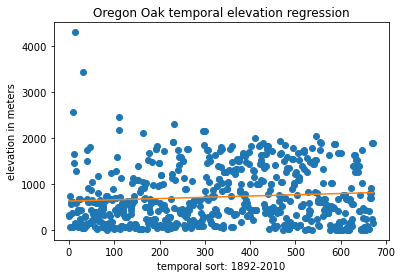

In [161]:
x = df_oakelev['count']
plt.plot(df_oakelev['count'], df_oakelev['elevation'], 'o')
m, b = np.polyfit(df_oakelev['count'], df_oakelev['elevation'], 1)
plt.title('Oregon Oak temporal elevation regression')
plt.xlabel('temporal sort: 1892-2010')
plt.ylabel('elevation in meters')
plt.plot(x, m*x+b)

In [162]:
b

625.9356616593403

In [163]:
m*672 + b

808.7121838087132

There's been an upward shift of approx. 183 m over the observation period..

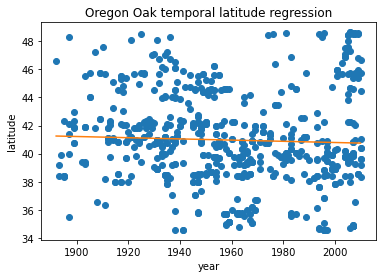

In [116]:
x = sorted_dfoakyr['year']
plt.plot(sorted_dfoakyr['year'], sorted_dfoakyr['decimalLatitude'], 'o')
m, b = np.polyfit(sorted_dfoakyr['year'], sorted_dfoakyr['decimalLatitude'], 1)
plt.title('Oregon Oak temporal latitude regression')
plt.xlabel('year')
plt.ylabel('latitude')
plt.plot(x, m*x+b)

In [117]:
m*1892 + b

41.2534464413205

In [118]:
m*2010 + b

40.74986078387238

A southward shift of approx .5 degrees of latitude.

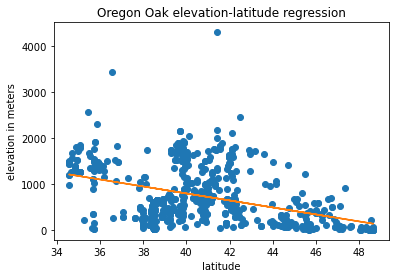

In [119]:
x = sorted_dfoakyr['decimalLatitude']
plt.plot(sorted_dfoakyr['decimalLatitude'], df_oakelev['elevation'], 'o')
m, b = np.polyfit(sorted_dfoakyr['decimalLatitude'], df_oakelev['elevation'], 1)
plt.title('Oregon Oak elevation-latitude regression')
plt.xlabel('latitude')
plt.ylabel('elevation in meters')
plt.plot(x, m*x+b)

In [120]:
m*37 + b

1018.7908319564926

In [121]:
m*47 + b

257.93920480831275

An average decrease of approx. 76 m in elevation for every degree of latitude as one heads north.

One can also run a time series analysis on the data which will separate out seasonal cycles and residual noise to obtain a more nuanced picture of any trend.

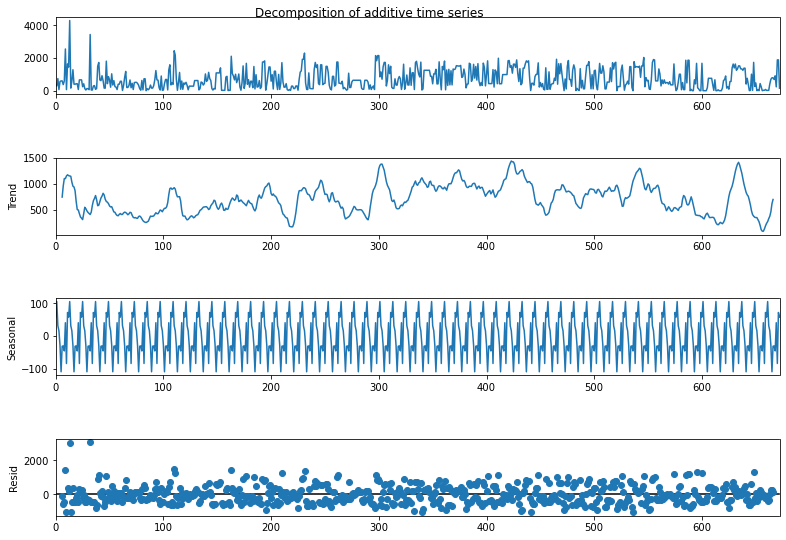

In [141]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
df_oakelevts = df_oakelev.set_index('count')
df_oakelevts.sort_index(inplace=True)
df_oakelevts.index.inferred_freq = 'M'
decomposition_add = sm.tsa.seasonal_decompose(df_oakelevts, model='additive')
fig = decomposition_add.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of additive time series')
plt.show()

Obtain a date for any particular point of interest.

In [143]:
sorted_dfoakyr['eventDate'][300]

'1953-08-27T00:00:00'

Import a chart of global temperature rise.

In [145]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://static01.nyt.com/images/2020/04/23/learning/GlobalTemp2019GraphLN/GlobalTemp2019GraphLN-superJumbo.png")

Incense Cedar (calocedrus decurrens) analysis:

In [4]:
import pandas as pd
df_cdr = pd.read_csv('Desktop/0081316-200613084148143 - 0081316-200613084148143.csv')

In [147]:
sorted_dfcdr = df_cdr.sort_values(by='eventDate')


In [148]:
sorted_dfcdryr = sorted_dfcdr.reset_index(drop=True)

In [150]:
#json
d_ar=[{}]*len(sorted_dfcdryr['decimalLatitude'])
for i in range(len(sorted_dfcdryr['decimalLatitude'][:])):
    d_ar[i]={"latitude":sorted_dfcdryr['decimalLatitude'][i],"longitude":sorted_dfcdryr['decimalLongitude'][i]}
location={"locations":d_ar}
json_data=json.dumps(location,skipkeys=int).encode('utf8')

#SEND REQUEST
url="https://api.open-elevation.com/api/v1/lookup"
response = urllib.request.Request(url,json_data,headers={'Content-Type': 'application/json'})
fp=urllib.request.urlopen(response)

#RESPONSE PROCESSING
res_byte=fp.read()
res_str=res_byte.decode("utf8")
js_str=json.loads(res_str)
#print (js_mystr)
fp.close()

#GETTING ELEVATION
response_len=len(js_str['results'])
elev_list2 = []
for j in range(response_len):
    elev_list2.append(js_str['results'][j]['elevation'])

In [151]:
elev_list2

[2053,
 836,
 634,
 799,
 348,
 816,
 1796,
 1569,
 938,
 1543,
 2688,
 963,
 1441,
 1923,
 621,
 804,
 1844,
 1408,
 1808,
 1808,
 1241,
 2273,
 2454,
 1102,
 1627,
 2307,
 125,
 1117,
 1570,
 2165,
 114,
 710,
 688,
 688,
 1130,
 2098,
 104,
 2136,
 2740,
 2136,
 351,
 351,
 1197,
 1488,
 1117,
 1846,
 1241,
 1604,
 1742,
 775,
 462,
 326,
 865,
 1646,
 1821,
 1646,
 654,
 1216,
 1197,
 1197,
 1878,
 441,
 441,
 146,
 2391,
 119,
 1467,
 356,
 356,
 224,
 1914,
 1377,
 1701,
 103,
 226,
 226,
 891,
 1020,
 641,
 628,
 449,
 1089,
 304,
 898,
 1408,
 1408,
 1048,
 1048,
 139,
 139,
 1477,
 1209,
 1209,
 655,
 1241,
 1584,
 1584,
 564,
 640,
 1722,
 1722,
 752,
 912,
 1841,
 398,
 398,
 473,
 70,
 70,
 2227,
 1746,
 950,
 359,
 723,
 1544,
 1664,
 1667,
 1667,
 1484,
 2168,
 1592,
 2028,
 1408,
 1408,
 1767,
 2061,
 393,
 1352,
 816,
 32,
 170,
 170,
 890,
 890,
 1525,
 146,
 1550,
 1558,
 1770,
 1125,
 1615,
 1224,
 1646,
 1646,
 1646,
 1646,
 2227,
 1627,
 1369,
 1667,
 1277,
 1392,


In [152]:
df_cdrelev = pd.DataFrame({'elevation':elev_list2})


In [164]:
df_cdrelev['count'] = df_cdrelev.index

In [165]:
df_cdrelev

,elevation,count
0,2053,0
1,836,1
2,634,2
3,799,3
4,348,4
...,...,...
611,1987,611
612,1987,612
613,1987,613
614,1692,614


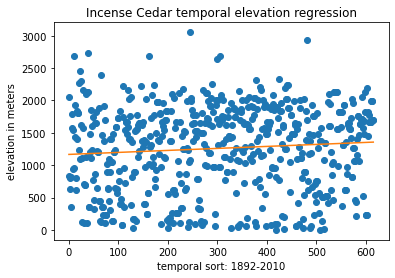

In [166]:
x = df_cdrelev['count']
plt.plot(df_cdrelev['count'], df_cdrelev['elevation'], 'o')
m, b = np.polyfit(df_cdrelev['count'], df_cdrelev['elevation'], 1)
plt.title('Incense Cedar temporal elevation regression')
plt.xlabel('temporal sort: 1892-2010')
plt.ylabel('elevation in meters')
plt.plot(x, m*x+b)

In [167]:
b

1167.1876486560443

In [168]:
m*616 + b

1357.364586632879

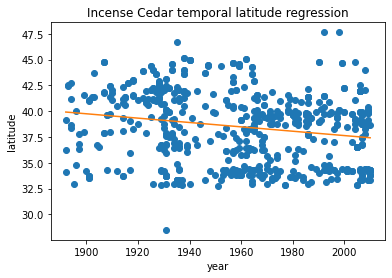

In [169]:
x = sorted_dfcdryr['year']
plt.plot(sorted_dfcdryr['year'], sorted_dfcdryr['decimalLatitude'], 'o')
m, b = np.polyfit(sorted_dfcdryr['year'], sorted_dfcdryr['decimalLatitude'], 1)
plt.title('Incense Cedar temporal latitude regression')
plt.xlabel('year')
plt.ylabel('latitude')
plt.plot(x, m*x+b)

In [170]:
m*1892 + b

39.91430468558922

In [171]:
m*2010 + b

37.42074715637242

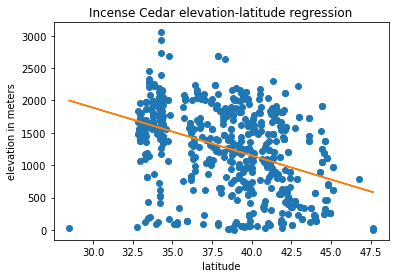

In [172]:
x = sorted_dfcdryr['decimalLatitude']
plt.plot(sorted_dfcdryr['decimalLatitude'], df_cdrelev['elevation'], 'o')
m, b = np.polyfit(sorted_dfcdryr['decimalLatitude'], df_cdrelev['elevation'], 1)
plt.title('Incense Cedar elevation-latitude regression')
plt.xlabel('latitude')
plt.ylabel('elevation in meters')
plt.plot(x, m*x+b)

In [173]:
m*37 + b

1371.0959408810395

In [174]:
m*47 + b

630.7415015900879

Thus far the analysis has been performed through proxies of temperature change (altitude, latitude) and here is an attempt at a more direct one.  The USDA utilizes a Plant Hardiness Zone system for mapping climatic conditions suitable for plant growth.  The zones are based on average annual winter extremes.



In [21]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://planthardiness.ars.usda.gov/PHZMWeb/images/72dpi/all_states_halfzones_title_legend_logos_72dpi.jpg")

Import the geopandas library in order to read in a file which contains coordinate data of the different zone regions for the continental US.

In [1]:
import geopandas as gpd

phzm = gpd.read_file('zip://Downloads/phm_us_shp.zip')

phzm

,ID,GRIDCODE,ZONE,geometry
0,1,14,7b: 5 to 10 F,"POLYGON ((-121.59583 49.07917, -121.59583 49.0..."
1,2,12,6b: -5 to 0 F,"POLYGON ((-121.54583 49.07917, -121.55417 49.0..."
2,3,12,6b: -5 to 0 F,"POLYGON ((-121.50417 49.07917, -121.51250 49.0..."
3,4,12,6b: -5 to 0 F,"POLYGON ((-121.47917 49.08750, -121.47083 49.0..."
4,5,11,6a: -10 to -5 F,"POLYGON ((-121.39583 49.07917, -121.39583 49.0..."
...,...,...,...,...
97156,97157,21,11a: 40 to 45 F,"POLYGON ((-81.02917 24.65417, -81.02917 24.662..."
97157,97158,21,11a: 40 to 45 F,"POLYGON ((-82.87083 24.54583, -82.92083 24.545..."
97158,97159,22,11b: 45 to 50 F,"POLYGON ((-82.00417 24.52917, -82.01250 24.529..."
97159,97160,22,11b: 45 to 50 F,"POLYGON ((-81.10417 24.78750, -81.10417 24.770..."


Convert the cedar pandas dataframe into a geopandas dataframe which will then allow for a spatial join, synchronizing the locations of the Incense Cedar occurrences with the appropriate locations from the Plant Hardiness Zone file, allowing one to  link a particular occurrence to a certain zone.

In [5]:
gdf_cdr = gpd.GeoDataFrame(df_cdr,   geometry=gpd.points_from_xy(df_cdr.decimalLongitude, df_cdr.decimalLatitude))# 3 - Neighbourhoods
gdf_cdr.crs = "EPSG:4269"
sjoined_cdr = gpd.sjoin(gdf_cdr, phzm)
sjoined_cdr

,genus,species,infraspecificEpithet,scientificName,locality,stateProvince,decimalLatitude,decimalLongitude,eventDate,year,taxonKey,geometry,index_right,ID,GRIDCODE,ZONE
0,Calocedrus,Calocedrus decurrens,NaN,Libocedrus decurrens Torr.,Lando,South Carolina,34.800806,-81.067194,1992-04-03T00:00:00,1992,2683938,POINT (-81.06719 34.80081),96594,96595,14,7b: 5 to 10 F
1,Calocedrus,Calocedrus decurrens,NaN,Calocedrus decurrens (Torr.) Florin,Memphis,Tennessee,35.126090,-89.983685,1981-04-07T00:00:00,1981,2683936,POINT (-89.98368 35.12609),96594,96595,14,7b: 5 to 10 F
6,Calocedrus,Calocedrus decurrens,NaN,Calocedrus decurrens (Torr.) Florin,"Rock Creek Park Cemetery, Rock Creek Church Ro...",District of Columbia,38.899556,-77.057200,1981-06-10T00:00:00,1981,2683936,POINT (-77.05720 38.89956),96594,96595,14,7b: 5 to 10 F
437,Calocedrus,Calocedrus decurrens,NaN,Libocedrus decurrens Torr.,U.N.C. [University of North Carolina at Chapel...,North Carolina,35.910144,-79.048622,1957-06-11T00:00:00,1957,2683938,POINT (-79.04862 35.91014),96594,96595,14,7b: 5 to 10 F
438,Calocedrus,Calocedrus decurrens,NaN,Libocedrus decurrens Torr.,"Arboretum, U.N.C. [University of North Carolin...",North Carolina,35.913721,-79.048978,1917-03-19T00:00:00,1917,2683938,POINT (-79.04898 35.91372),96594,96595,14,7b: 5 to 10 F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,Calocedrus,Calocedrus decurrens,NaN,Calocedrus decurrens (Torr.) Florin,"Salmon Mountains, Klamath National Forest. Nea...",California,41.050000,-122.966667,1954-05-01T00:00:00,1954,2683936,POINT (-122.96667 41.05000),48283,48284,14,7b: 5 to 10 F
519,Calocedrus,Calocedrus decurrens,NaN,Calocedrus decurrens (Torr.) Florin,Between Sonora Pass and the Dardanelles along ...,California,38.316667,-119.666667,1961-09-01T00:00:00,1961,2683936,POINT (-119.66667 38.31667),74947,74948,11,6a: -10 to -5 F
554,Calocedrus,Calocedrus decurrens,NaN,Calocedrus decurrens (Torr.) Florin,NaN,NaN,42.350000,-123.580000,1928-06-08T00:00:00,1928,2683936,POINT (-123.58000 42.35000),40362,40363,15,8a: 10 to 15 F
580,Calocedrus,Calocedrus decurrens,NaN,Calocedrus decurrens (Torr.) Florin,"2 mi. NW of Capir Ranger Sta., Ochoco Forest.",Oregon,44.376400,-120.116700,1947-07-03T00:00:00,1947,2683936,POINT (-120.11670 44.37640),27996,27997,10,5b: -15 to -10 F


The zones are convertible to a gridcode, running from 1 to 26 with 1 being the coldest and 26, the most tropical.

In [6]:
sorted_dfcdr = sjoined_cdr.sort_values(by='eventDate')
sorted_dfcdryr = sorted_dfcdr.reset_index(drop=True)
tempcdr = sorted_dfcdryr['GRIDCODE']
tempcdr = pd.DataFrame(tempcdr)
tempcdr['count'] = tempcdr.index
tempcdr

,GRIDCODE,count
0,14,0
1,17,1
2,17,2
3,16,3
4,16,4
...,...,...
611,16,611
612,16,612
613,16,613
614,16,614


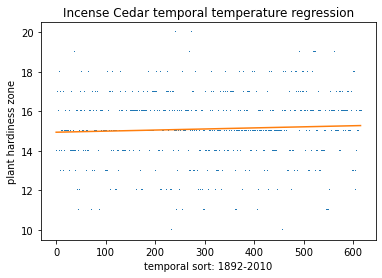

In [9]:
import matplotlib.pyplot as plt
import numpy as np
tempcdr = tempcdr.astype({"count": float, "GRIDCODE": float})


x = tempcdr['count']
plt.plot(tempcdr['count'], tempcdr['GRIDCODE'], ',')
m, b = np.polyfit(tempcdr['count'], tempcdr['GRIDCODE'], 1)
plt.title('Incense Cedar temporal temperature regression')
plt.xlabel('temporal sort: 1892-2010')
plt.ylabel('plant hardiness zone')
plt.plot(x, m*x+b)

Run a regression using the seaborn library with a translucent 95% confidence interval shading.

<AxesSubplot:xlabel='count', ylabel='GRIDCODE'>

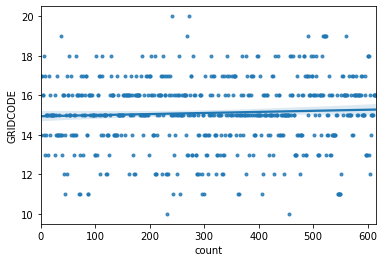

In [17]:
import seaborn as sns
sns.regplot(x = 'count', y ='GRIDCODE', data=tempcdr, marker = '.')

In [23]:
from scipy import stats
stats.linregress(x= tempcdr['count'], y = tempcdr['GRIDCODE'])

LinregressResult(slope=0.0005466486709321831, intercept=14.942295144077963, rvalue=0.056607144087349806, pvalue=0.1605500347405226, stderr=0.0003890952501914082)

The p value for the temperature regression is not statistically significant (< .05) and thus one can't reject a null hypothesis.

In the final analysis, the results are indeterminate.  Certain species like the Whitebark Pine seem to show an unambiguous preference for colder locations, whereas others are more confounded.  It is notable that all 5 species show a preference for higher elevations, although the confounding makes it less clear that temperature is the reason.